 # Distributions: Specifying distributions

In [4]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import stats

In [5]:
%matplotlib inline
az.style.use("arviz-darkgrid")
RANDOM_SEED = 8265
np.random.seed(RANDOM_SEED)

* Distributions as code
* What is: We had a p value distribution for our A/B test by why?
* A specific distribution fit our needs, the beta distribution
* There is math that specifies distributions
* But in our case we'll specifying distributions with code


# Specifying distributions precisely
Using parameters and code to shape the distributions we'll work with

# The shape of the conversion distribution
Recall our A/B test example, we need a way to represent the probability of conversion

And not only one probability of conversion
* Every probability of conversion
* and our relative belief in each probability

# A possible  p(Conversion) distribution
One possible distribution is the one below, but *why* is this distribution the shape it is? And why is bounded from 0 to 1?

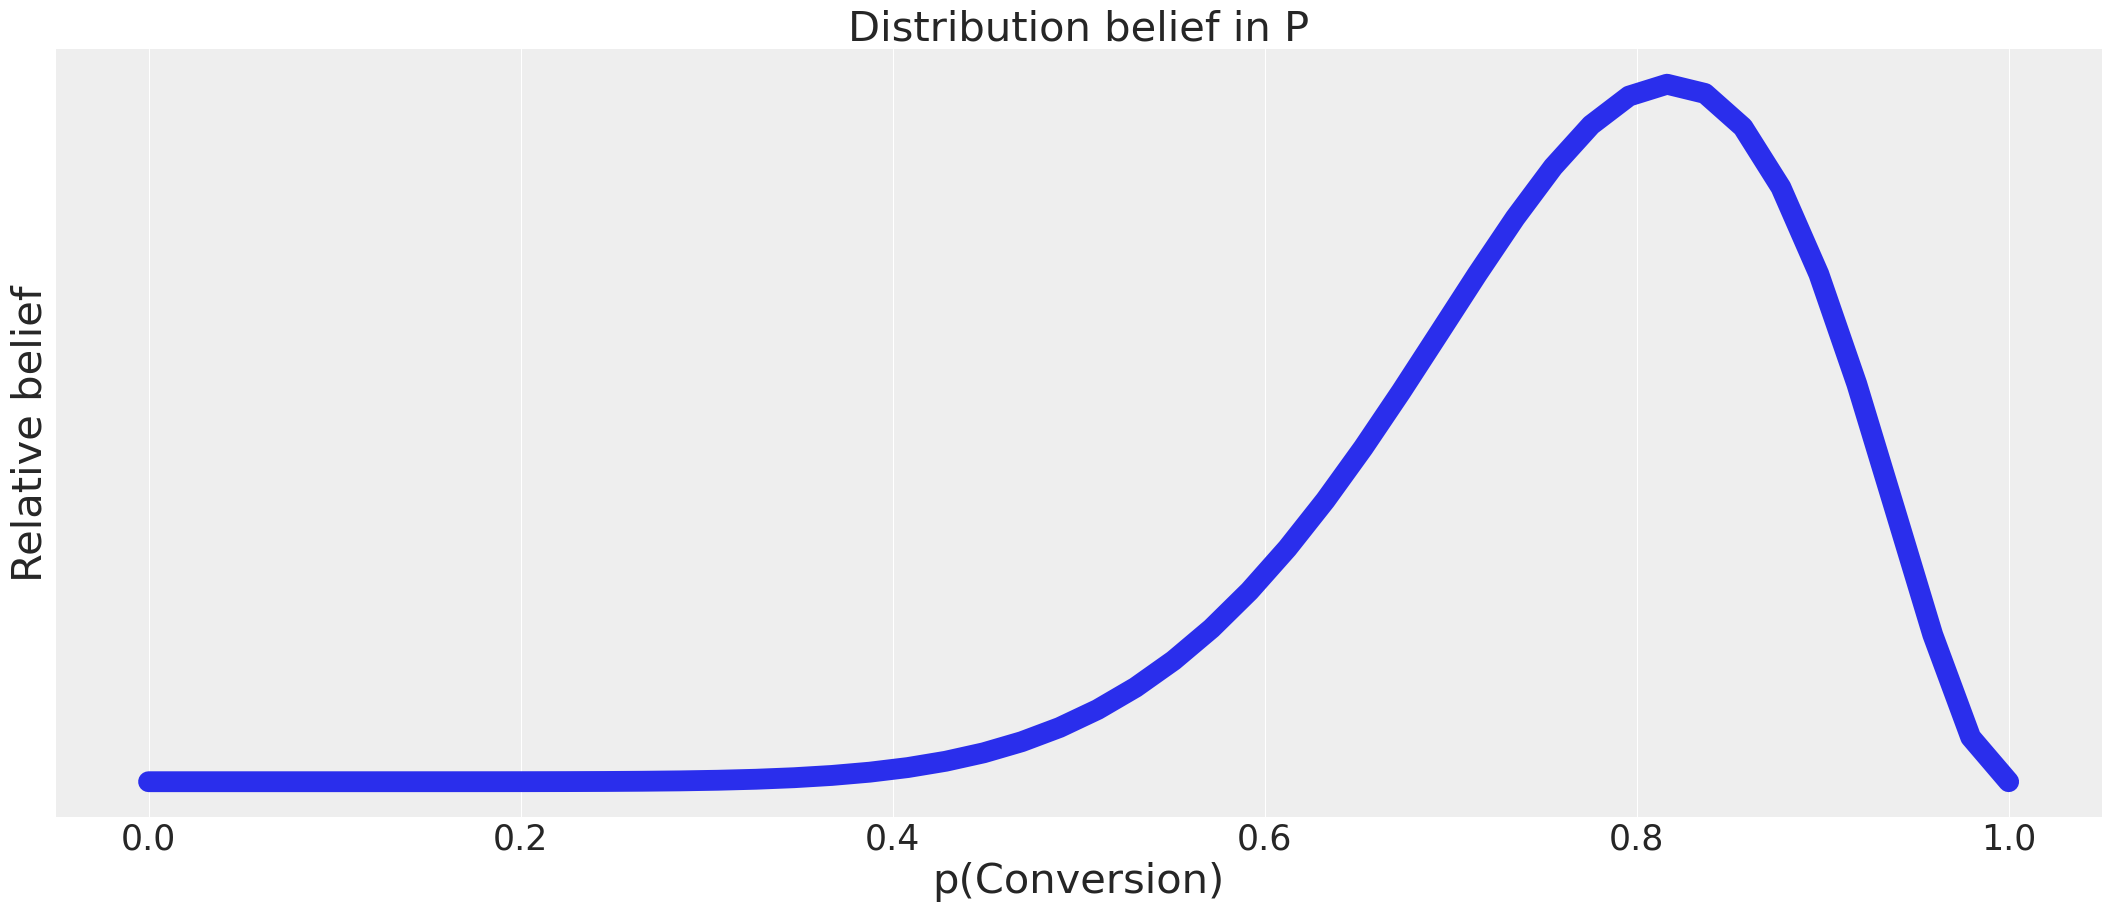

In [8]:
beta_dist = stats.beta(10, 3)
x = np.linspace(0, 1)
y = beta_dist.pdf(x)
fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)

ax.set_yticks([])
ax.set_title("Distribution belief in P", fontsize=30)
ax.set_xlabel("p(Conversion)", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)


# Distribution choice and  parameters
It's because we chose both a *Beta* distribution and its *parameters*

The choice of Beta distributions bounds possible values to the domain of (0,1).
The choice of parameters is what specifies the shape of the Beta distribution

In this case the distribution is a *Beta(10, 3)*


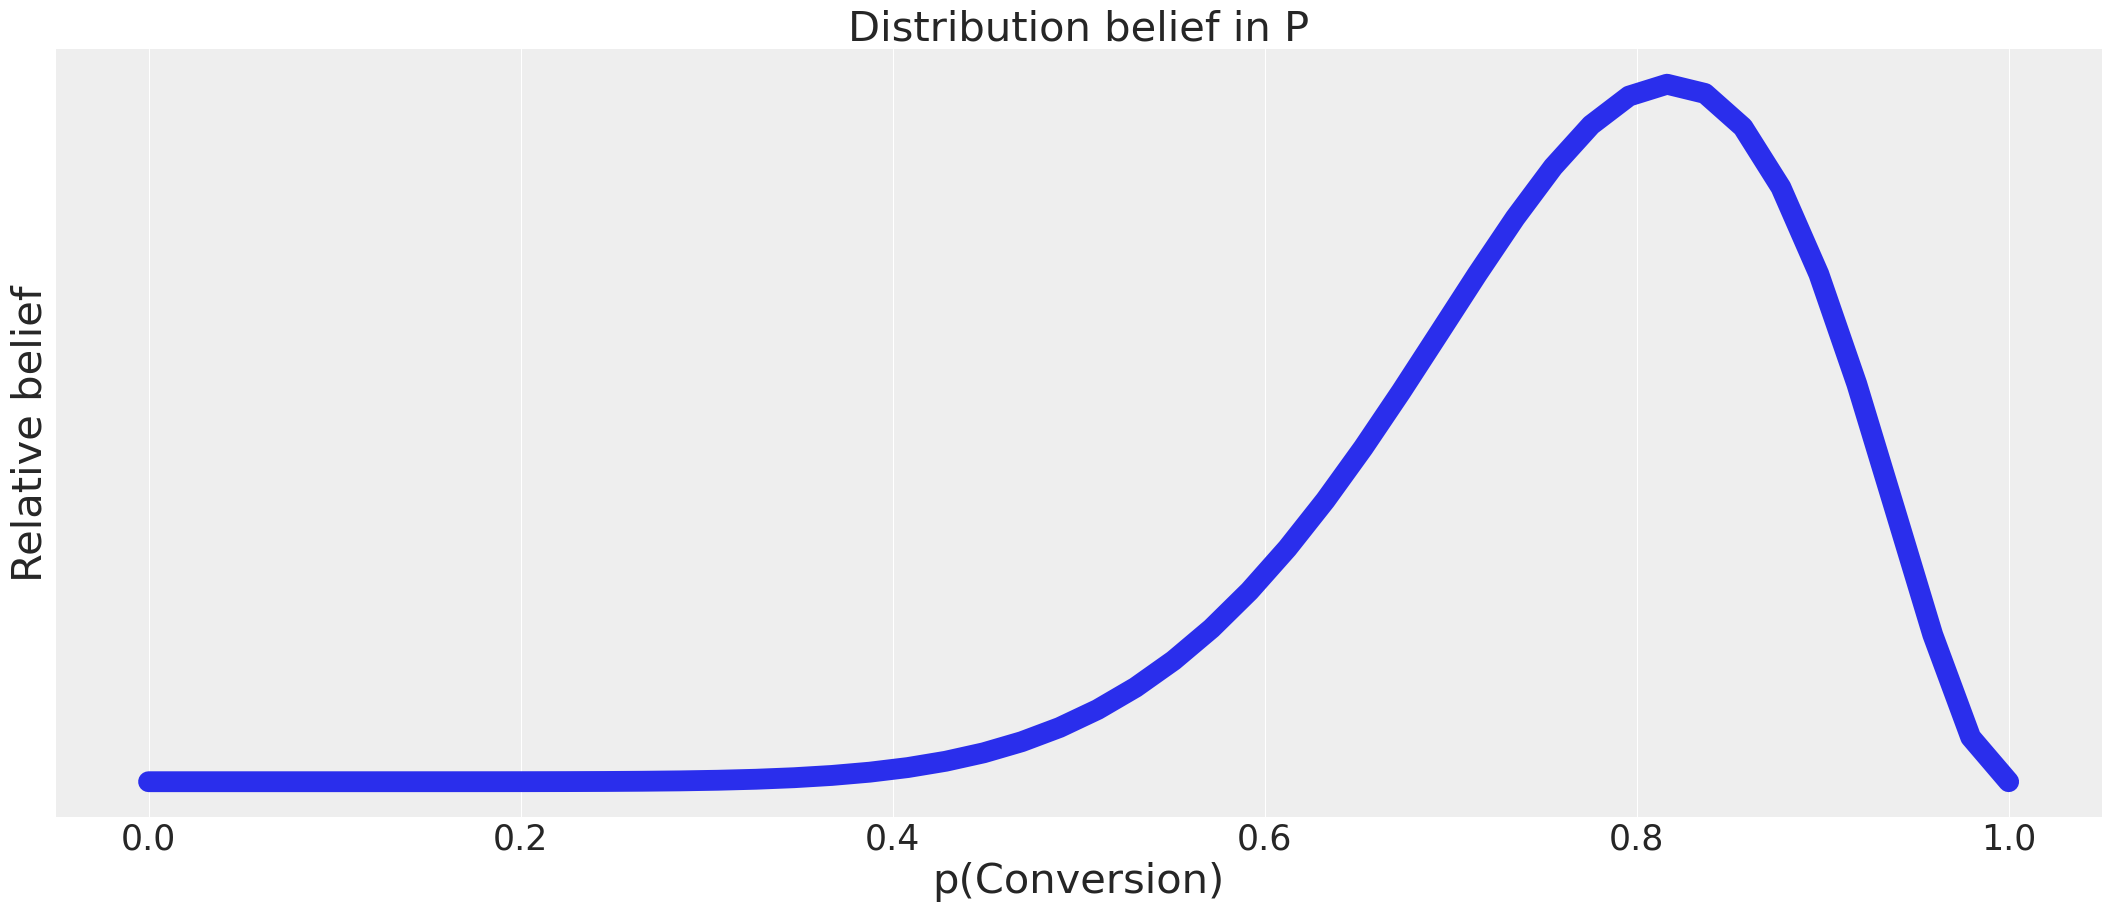

In [9]:
beta_dist = stats.beta(10, 3)
x = np.linspace(0, 1)
y = beta_dist.pdf(x)
fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)

ax.set_yticks([])
ax.set_title("Distribution belief in P", fontsize=30)
ax.set_xlabel("p(Conversion)", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)

# Other chioces of distribution parameters
Below are three other distributions with different parameterizations. 

They all have different shapes based on the different parameters used to specify each, even though all three are *beta* distributions

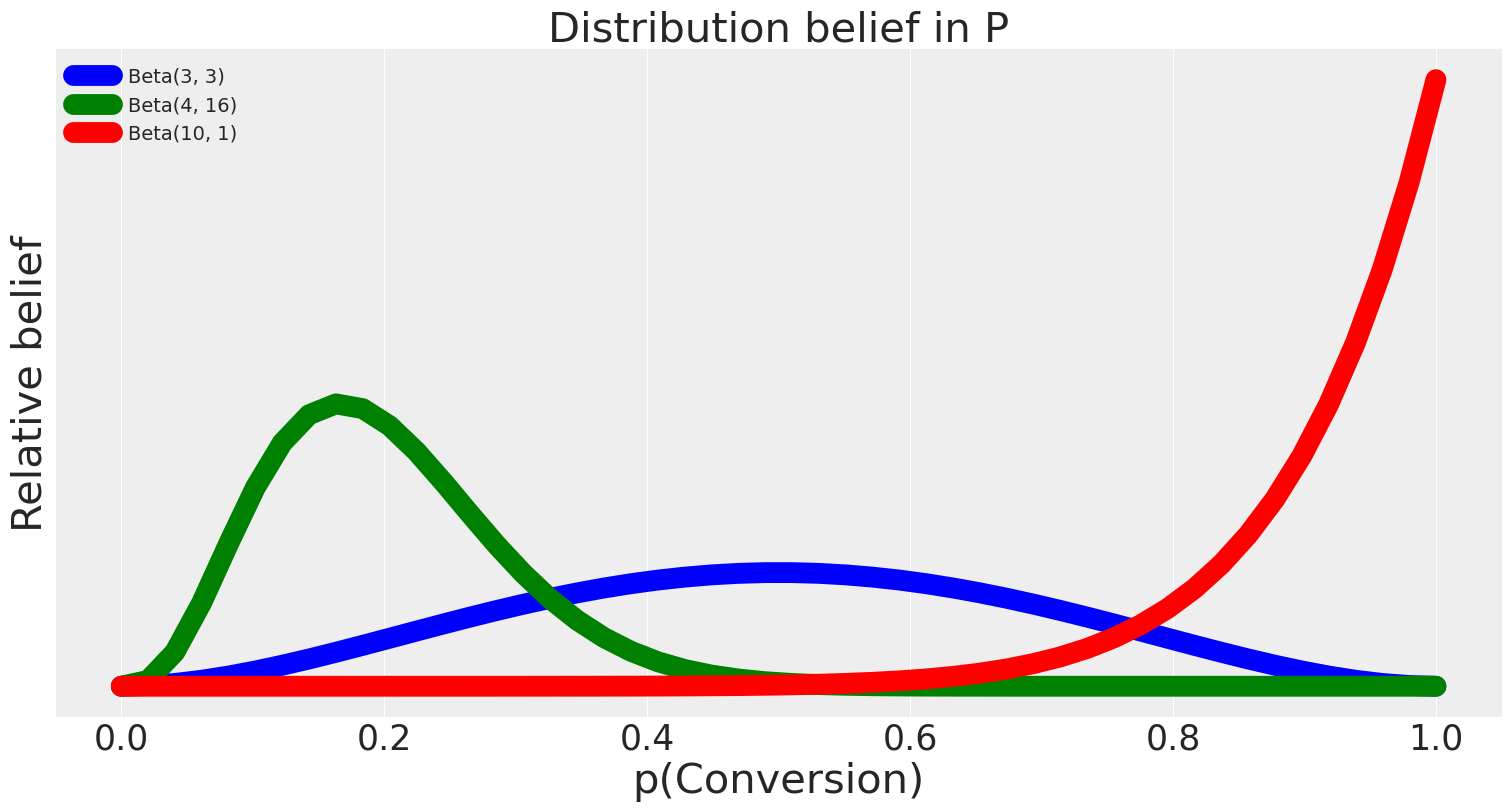

In [10]:
fig, ax = plt.subplots(figsize=(15,8))

for i, (a, b, c) in enumerate(((3,3,'blue'), (4,16,'green'), (10,1,'red'))):

    beta_dist = stats.beta(a, b)
    x = np.linspace(0, 1)
    y = beta_dist.pdf(x)
    ax.plot(x,y, linewidth=15, c=c, label=f"Beta({a}, {b})")

    ax.set_yticks([])
    ax.set_title("Distribution belief in P", fontsize=30)
    ax.set_xlabel("p(Conversion)", fontsize=30)
    ax.set_ylabel("Relative belief", fontsize=30)
    ax.tick_params(axis='x', labelsize=25)

ax.legend()

# Distributions as code, instead of math

Distributions have traditionally been specified with mathematical notional such as the one below. This theoretical definition is important for proofs and such

$$ \Large
\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1} 
$$

However in this course we will be specifying distributions with code. This will allow us to use distributions for computation as you'll see throughout this course.

In [ ]:
beta_1 = stats.beta(1,2)
beta_2 = stats.beta(3, 10)

# 🤔 Notation and naming is not always consistent
Distributions are used by a wide variety of people across a wide variety of fields. The wide applicabiility is a great, but what is not is the subtle inconsistencies.

Mathematically identical distriibutoins can be parameterized using different symbols depending onn who wrote the code or library, even if the underlying distribution is the same.

For example, more mathematical authors will use greek symbols

In [ ]:
μ = 0, σ =1
norm_1 = stats.norm(μ, σ)

Other times they are parameterized by the phonetic names

In [ ]:
mu = 0, sigma =1
norm_1 = stats.norm(mu, sigma)

And in other cases they are parameterized by intuitive names, such as "loc" short for location, or "scale"

In [ ]:
mu=0, sigma=1
norm_1 = stats.norm(loc=0, scale=1)

While we wish the world was standardized it unfortuately is not the case. Refer to the documentation of each library used to double check what you intend to specify is indeed what the library is expecting.

The good news is after some time you'll be able to read all forms of notation equally well.

# Section Recap
* Two things are needed to fully specify a distribution
    * The specific distribution itself
    * The parameters for that distribution
* This course will use distributions specified in code
* Distribution parameterization naming is not consistent across libraries and sources
  * Use references often when starting out to get thiings right

# Slides below are skipped

In [3]:
np.mean([2,2,4,6])

3.5

This *doesn't* mean the math is not important, its not the only way to learn and "get stuff done" these days.

This will be one of the few sections that shows the math symbols. Subsequent sections will focus on the code.

# Introducing the Bernoulli distribution
A Bernoulli distribution is just a distribution that describes the probability of one outcome in a binary situation. Or in other words

The probability
* A coin toss is heads
* that the person of your dreams says yes to a dinner date
* you eat a salad today

Two outcomes does not mean 50/50 chance!

# Let's computationally define a distribution
We'll specify .3 chance of observing a *1*, which implicitly means .7 chance of observing a *0*

We could specify this mathematically as such
$$
f(k;p) = \begin{cases}
   p & \text{if }k=1, \\
   q = 1-p & \text {if } k = 0.
 \end{cases} \\
 \text{where }p =.3 
$$

In the case of the Bernoulli distribution one parameter *p* is needed to fully specify the distribution, and k is the random outcome.


Let's specify the distribution using code. We'll be using the `scipy.stats` library

In [28]:
p = 0.3
bern = stats.bernoulli(p)

# Plotting the Probability Mass Function

Now that we've defined a probability distribution defined computationally we can use it to determine the amount of *mass* associated with the potential outcomes 0 and 1

In [30]:
bern.pmf(0), bern.pmf(1)

(0.7, 0.3)

# We can plot the probability mass function too
The vertical height represents the proportion of mass associated with each outcome 0 and 1. 

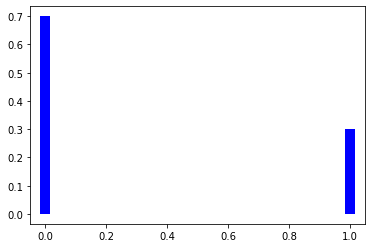

In [39]:
fig, ax = plt.subplots()
potential_outcomes = np.arange(2)
ax.vlines(potential_outcomes, 0, bern.pmf(potential_outcomes), colors='b', linestyles='-', lw=10);

Right now you may be thinking Well "duh", that was obvious. We didn't a computer to tell us that. Let's work through a more complicated case.

# Introducing the Binomial distribution
What if we now are interested in the probability of N number of successful outcomes, where the probability of success is .3 and we run 7 trials.

For example in a 7 day week, if there is a 30% chance we eat a salad, in a given week what is probability we eat 0, 1,2,3,4,5,6 or 7 salads?

As before we have a mathematical formulation 

$ f(k,n,p) = \Pr(k;n,p) = \Pr(X = k) = \binom{n}{k}p^k(1-p)^{n-k}$

In this case there are two parameters are needed to specify the distribution,
* *p* the probability of success on an individual trial 
* *n* the number of trials. 

K is the random outcome, which represents how many sucess

# Calculating a probability for a single random outcome
What is the chance we eat we eat 3 salads in a 7 day period?

In [48]:
binom = stats.binom(n=7, p=.3)

number_of_salads_we_might_eat = 3
binom.pmf(number_of_salads_we_might_eat)

0.2268944999999999

There's a 22% chance 

# Plotting a binomial probability mass function
Because we defined things computationally we can use our handy plotting tools to visualize the probability mass function

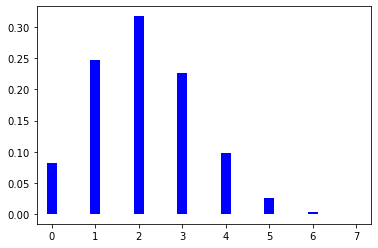

In [46]:
fig, ax = plt.subplots()
potential_outcomes = np.arange(8)
ax.vlines(potential_outcomes, 0, binom.pmf(potential_outcomes), colors='b', linestyles='-', lw=10);

We'd use the probability mass function to tell us. In this case we can see that 1 is less likely than 0, and we can see by how much

# Mapping potential outcomes to probability is key

Probability mass functions convert *potential outcomes* to the probability that the outcome will occur.
To do so we must have a distribution with parameters that fully specify the range and shape of the probability

# What about continuous outcomes?

So far we've covered discrete outcomes, but what about continuous outcomes, like the range of human heights?

The intuition is best gained if we jump into an example

What if we knew the distribution of human heights is distributed with mean 127 centimeters and standard deviation 20? 

What is the probability that find someone with height 120 cm?

# Specification with math notation: Normal Distribution

Like before there is a formal mathematical definition for Normal distribution  
$$
\LARGE
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}
$$

We can directly to mathematical code if we'd like

In [51]:
# Distribution parameters
μ, σ = 127, 20

x = 120
1 / (σ * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 * ((x - μ) / σ) ** 2)

0.0187620173458469

But its much easier to use `scipy.stats`

In [52]:
heights = stats.norm(127, 20)
heights.pdf(120)

0.018762017345846895

# So we got our answer right?
In both calculations we got a value of .18, which means 18% right?

**Wrong** 

In continuous distribution we are no longer getting a probability *mass* but instead a probability *density*. You may have noticed the method signature changed from `dist.pmf` to `dist.pdf` to reflect this change.

# Warning: Counter Intuitive Concept 
The probability of an observation of any single number in a continuous distribution is **0**, whether that be 120, 127, 4000, or 10.

This is because of the foundational way mathematical measure theory works. In a continuous distribution any single number is infinitely small so it can't have mass. We can get the probability for a *range* of numbers but that's not important for this course.

What is important is the relative value which the probability density function gives us. Let's walk through an example

# Probability Density Function Introduction
PDFs that take in a value, and output the relative *likelihood* of that value occurring given a distribution.

In [42]:
heights.pdf(127), heights.pdf(100)

(0.019947114020071634, 0.00801916636709598)

The numbers were are telling us that finding a person with height 127cm is more likely than finding someone with height 100

# Visual representation of PDF and relative heights
Unlike our bernoulli plot, a plot of a normal distribution with PDFs is very helpful.

In blue is the PDF for a range of possible heights. The red lines represent the PDF value of 100 cm and 127 cm.

[None]

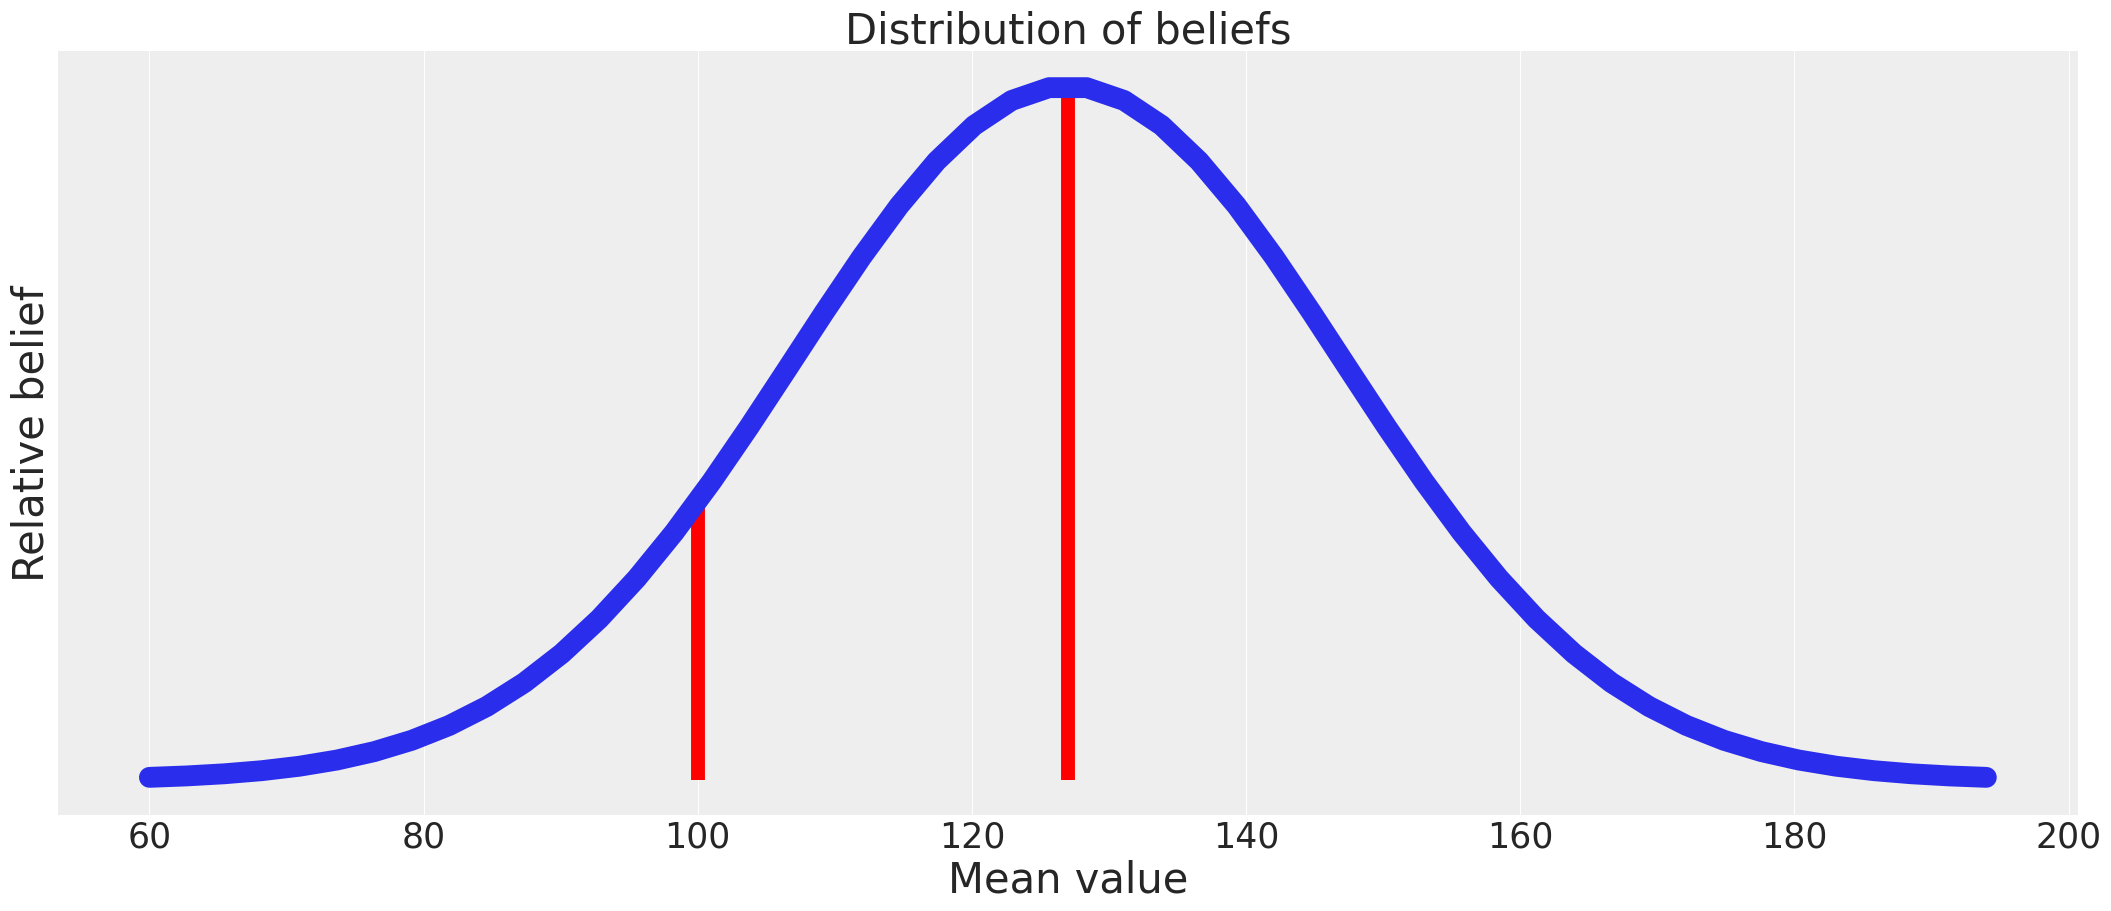

In [40]:
x = np.linspace(60, 194)
y = heights.pdf(x)

fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)
ax.set_yticks([])
ax.set_title("Distribution of beliefs", fontsize=30)
ax.set_xlabel("Mean value", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
markerline, stemline, baseline = ax.stem(100, heights.pdf(100), "r")
plt.setp(stemline, linewidth = 10)

markerline, stemline, baseline = ax.stem(127, heights.pdf(127), "r")
plt.setp(stemline, linewidth = 10)

The length of the red lines makes it much easier to judge the relative likelihood of the outcomes.

# What is Log PDF
Its just the PDF value but transformed into the log scale. 

This is done for purely computational stability reasons. Again this is a computational detail that is not important to understand up front. We bring this up as you may hear the term logpdf and don't want it to surprise you.

So be aware you may see the the terms pdf, and logpdf. Just translate that in your head as "a thing that gives me relative likelihoods of seeing a certain value"

In [20]:
np.log(heights.pdf(127)), heights.logpdf(127)

(-3.9146708067586635, -3.9146708067586635)

# Section Recap
* Probability Mass and Density functions tell us how the probability of observations is *spread* across a range of possible values
* If we have a possible value, we can use PMF and PDF to tell us the relative likelihood of occurrence of that value, versus any other value *That's all you need to takeaway*
* Log PDF the same concept, just with a mathematical transform applied
